In [1]:
#-----Loading in packages-----#
import anndata as ad #building anndata objects
import scanpy as sc # Single cell analysis 
import pandas as pd # dataframe manipulation 
import scvelo as scv #Streamlines
import cellrank as cr #transition matrix, etc 
import numpy as np
from scipy.io import mmread #Reading in mtx file 
from scipy.sparse import csr_matrix #convert from coo to csr matrix
#import fa2 as fa2
import os as os
# Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Trajectory Analysis
import palantir

In [2]:
#------Loading in AnnDatas------#
SG = sc.read_h5ad("/projects/b1217/Edward/R_Projects/HHA/20250520_SG.h5ad")
Duct = sc.read_h5ad("/projects/b1217/Edward/R_Projects/HHA/20250520_Duct.h5ad")
print(SG)
print(Duct)

AnnData object with n_obs × n_vars = 40424 × 18085
    obs: 'orig.ident', 'nCount_Spatial.008um', 'nFeature_Spatial.008um', 'nCount_Log_008um', 'nFeature_Log_008um', 'LowCounts', 'leverage.score', 'unintegrated.sketched_1.0', 'seurat_clusters', 'unintegrated.sketched_2.0', 'unintegrated.sketched_3.0', 'harmony.sketched_1.0', 'harmony.sketched_2.0', 'harmony.sketched_3.0', 'harmony.projected_1.0', 'harmony.projected_1.0.score', 'harmony.projected_2.0', 'harmony.projected_2.0.score', 'harmony.projected_3.0', 'harmony.projected_3.0.score', 'InitialAnnotationBroad', 'InitialAnnotationFine', 'unintegrated_clusters', 'harmony_clusters_0.3', 'harmony_clusters_0.5', 'harmony_clusters_0.6', 'harmony_clusters_0.75', 'LogFeature', 'LogCount', 'QCThreshold', 'harmony_clusters_0.4', 'harmony_clusters_0.35', 'UpperAnnotation', 'harmony_clusters_0.25', 'SGAnnotation', 'SGAnnotationOrdered', 'PalantirPseudotime', 'AUCell_Peripheral', 'AUCell_Early_Maturation', 'AUCell_Mid_Maturation', 'AUCell_Late_Mat

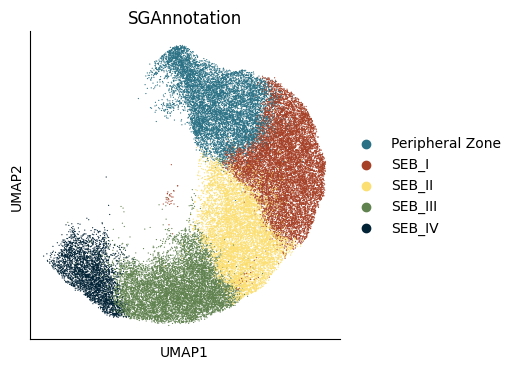

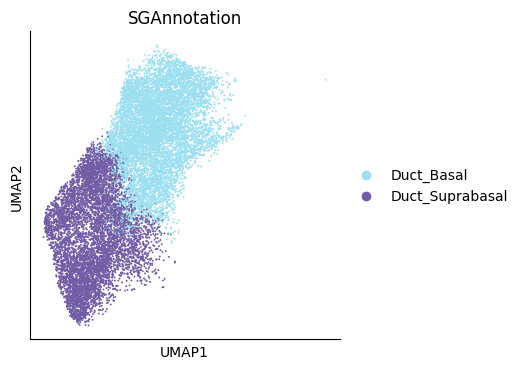

In [8]:
#------Plotting UMAPs-------#
#SG
sc.pl.umap(SG, color = "SGAnnotation", cmap = "magma")
#Duct
sc.pl.umap(Duct, color = "SGAnnotation", cmap = "magma")

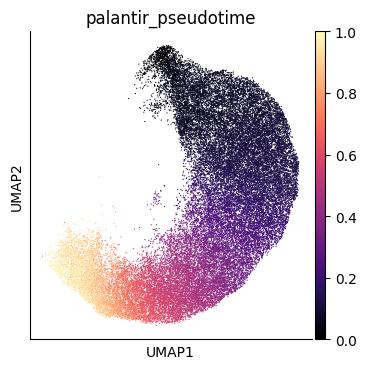

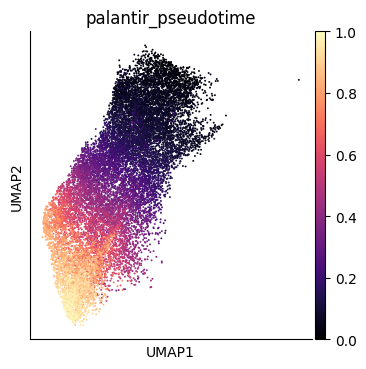

In [9]:
#------Plotting UMAPs-------#
#SG
sc.pl.umap(SG, color = "palantir_pseudotime", cmap = "magma")
#Duct
sc.pl.umap(Duct, color = "palantir_pseudotime", cmap = "magma")

In [6]:
#------Writing Pseudotimes to csv-----#
work_dir = "/projects/b1217/HHA/SG_Trajectory/Pseudotime_Duct_SG/Palantir/"
#SG
SG_pseudotime = pd.DataFrame({"PalantirPseudotime": SG.obs["palantir_pseudotime"]})
SG_pseudotime.to_csv(os.path.join(work_dir, "SG_Palantir_Pseudotime_5_20_25.csv"))
#Duct
Duct_pseudotime = pd.DataFrame({"PalantirPseudotime": Duct.obs["palantir_pseudotime"]})
Duct_pseudotime.to_csv(os.path.join(work_dir, "Duct_Palantir_Pseudotime_5_20_25.csv"))